In [92]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.metrics import mean_squared_error
% matplotlib inline

In [93]:
dataframe = pd.read_csv('titanic.csv')

In [94]:
dataframe.head(2)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833


In [95]:
dataframe.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,0.645998,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,0.478480,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,0.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.32920


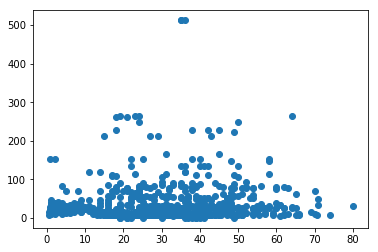

In [96]:
age = dataframe['Age']
fare = dataframe['Fare']
plt.plot(age,fare,'o')

In [97]:
dataframe.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

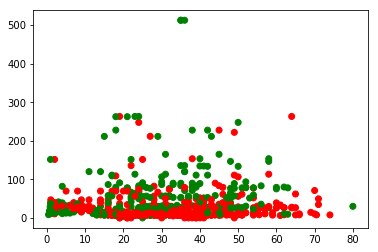

In [98]:
# to distinguish in the plot who survived and who did not let us assign different colors

age = dataframe['Age']
fare = dataframe['Fare']
survived = dataframe['Survived']
#plt.plot(age,fare,'o')
colors = []
for item in survived:
    if item > 0:
        colors.append('green')
    else:
        colors.append('red')
        
plt.scatter(age,fare, color =colors) #figsize = (20,10))

# Building a model

In [99]:
dataframe.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [100]:
dataframe = dataframe.drop(['Name'], axis = 1)

In [101]:
features = dataframe.iloc[:,1:]
target = dataframe.iloc[:,0]

In [102]:
#features_train, target_train = features[0:710],target[0:710]
#features_test,target_test = features[710:], target[710:]

In [103]:
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [104]:
model = GaussianNB()
model_fit = model.fit(features_train, target_train)

In [105]:
predictions = model.predict(features_test)

In [106]:
predictions

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [108]:
#comparing predicted values with real values
for item in zip(predictions,target_test):
    print(f'predicted was: {item[0]} : real value was : {item[1]}')

predicted was: 0 : real value was : 1
predicted was: 0 : real value was : 0
predicted was: 0 : real value was : 0
predicted was: 0 : real value was : 1
predicted was: 0 : real value was : 0
predicted was: 1 : real value was : 1
predicted was: 0 : real value was : 0
predicted was: 0 : real value was : 0
predicted was: 1 : real value was : 1
predicted was: 1 : real value was : 1
predicted was: 0 : real value was : 1
predicted was: 1 : real value was : 1
predicted was: 1 : real value was : 1
predicted was: 0 : real value was : 0
predicted was: 1 : real value was : 1
predicted was: 0 : real value was : 0
predicted was: 0 : real value was : 0
predicted was: 1 : real value was : 1
predicted was: 0 : real value was : 0
predicted was: 0 : real value was : 0
predicted was: 0 : real value was : 0
predicted was: 0 : real value was : 1
predicted was: 1 : real value was : 0
predicted was: 0 : real value was : 1
predicted was: 0 : real value was : 0
predicted was: 0 : real value was : 0
predicted wa

In [109]:
correct = 0
wrong = 0
for item in zip(predictions,target_test):
    if item[0] == item[1]:
        correct +=1
    else:
        wrong +=1
        
print(f'Number of correct predictions: = {correct}')
print(f'Number of wrong predictions: = {wrong}')

Number of correct predictions: = 204
Number of wrong predictions: = 63


In [112]:
#calculating the score manually
correct/(correct + wrong)

0.7640449438202247

In [114]:
# calculate model performance with the in-built function
accuracy = model.score(features_test,target_test)
accuracy

0.7640449438202247

NameError: name 'yam' is not defined